In [14]:
from blocks.extensions.saveload import load
import numpy
import theano
from theano import tensor
from fuel.streams import ServerDataStream
import matplotlib.pyplot as plt
from blocks.graph import ComputationGraph

%matplotlib inline

In [9]:
from models.bdrx3DCNN import get_model

/home/ubuntu/mnt/Theano/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


In [11]:
input_var  = tensor.tensor4('image_features')
target_var = tensor.tensor4('image_targets')
multiply_var = tensor.matrix('multiplier')
multiply_var = tensor.addbroadcast(multiply_var, 1)

In [12]:
test_prediction, prediction, loss, params = get_model(input_var, target_var, multiply_var)

In [22]:
cg = ComputationGraph(prediction)
b = cg.shared_variables[4]

In [23]:
b.get_value()

array([[[[[ 0.0189434 , -0.01971421, -0.06787636],
          [-0.06234615,  0.04340324,  0.07700036],
          [ 0.0719879 , -0.03261419, -0.01059904]],

         [[ 0.03542847, -0.02545363,  0.02952683],
          [ 0.01486168, -0.0211506 , -0.07212377],
          [-0.06014736, -0.03951227,  0.00165055]],

         [[-0.00806009,  0.00597596, -0.01181784],
          [-0.01019616, -0.00098562, -0.06350189],
          [ 0.06406447,  0.05096266,  0.00927466]]],


        [[[ 0.02168172,  0.05311858,  0.02930204],
          [-0.07238609, -0.0479266 , -0.0571648 ],
          [-0.05819773, -0.01606301,  0.03998954]],

         [[-0.00250011, -0.07304809,  0.06299537],
          [-0.06172649,  0.00137069,  0.03572957],
          [-0.01611299,  0.07618224,  0.02211545]],

         [[-0.05089751, -0.07680383,  0.02058004],
          [-0.07200374,  0.04652566,  0.06172781],
          [ 0.06006083,  0.04608412, -0.03091631]]],


        [[[ 0.0814469 , -0.05182613, -0.00336937],
          [-0.0

In [30]:
params_test = numpy.load('best_weights.npz')
print len(params_test['arr_0'])


72


In [32]:
for p, value in zip(cg.shared_variables, params_test['arr_0']):
    
    p.set_value(value)

In [33]:
f = theano.function([input_var], test_prediction)

In [34]:
valid_stream = ServerDataStream(('cases', 'image_features', 'image_targets', 'multiplier'), False, hwm=10, port=5558)

In [35]:
ei = valid_stream.get_epoch_iterator()
d = next(ei)

In [36]:
out = f(d[1])

In [37]:
print d[2][0].shape

(12, 64, 64)


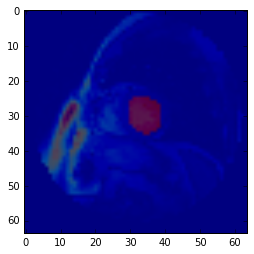

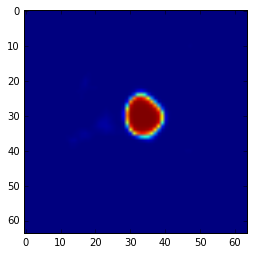

8.82913e-06 0.999227


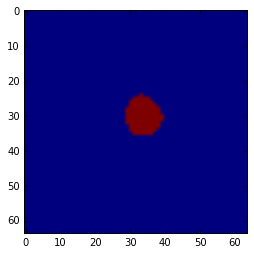

In [48]:
i = 0
frame = 10
plt.imshow(d[1][i,frame,:,:])
plt.imshow(d[2][i,frame,:,:], alpha=0.7)
plt.show()

plt.imshow(out[i,0,frame,:,:], vmin=0, vmax=1)
#plt.imshow(d[2][i,frame,:,:], alpha=0.7)
plt.show()

print out[i,0,frame,:,:].min(), out[i,0,frame,:,:].max()
plt.imshow(out[i,0,frame,:,:]>0.5)

In [39]:
params_test.keys()

['arr_0']

In [40]:
model = load('train')

Using saved session configuration for http://localhost:5006
To override, pass 'load_from_config=False' to Session


In [41]:
model.model

AttributeError: no model in this main loop

A possible reason: one of your extensions requires the main loop to have a model. Check documentation of your extensions.